In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

In [2]:
df=pd.read_csv("S:/Uber analysis/Uber Drives.csv")

In [3]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


cheaking missing values

In [4]:
#checking NaN

df.isnull()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1151,False,False,False,False,False,False,False
1152,False,False,False,False,False,False,False
1153,False,False,False,False,False,False,False
1154,False,False,False,False,False,False,False


In [5]:
df.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [6]:
#counting NaN

df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [7]:
#droping NaN
#it should be last option

df= df.dropna()

In [8]:
df.isnull().any()

START_DATE*    False
END_DATE*      False
CATEGORY*      False
START*         False
STOP*          False
MILES*         False
PURPOSE*       False
dtype: bool

In [9]:
df.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

DATE

In [10]:
df.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [11]:
#changing datatype of date from object to date

df["START_DATE*"]=pd.to_datetime(df["START_DATE*"], format="%m/%d/%Y %H:%M")

df["END_DATE*"]=pd.to_datetime(df["END_DATE*"], format="%m/%d/%Y %H:%M")

In [12]:
df.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [13]:
hour=[]
day=[]
dayofweek=[]
month=[]
weekday=[]

for x in df["START_DATE*"]:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])

df["HOUR"]=hour
df["DAY"]=day
df["DAY OF WEEK"]=dayofweek
df["MONTH"]=month
df["WEEKDAY"]=weekday


In [14]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY OF WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


In [15]:
df["CATEGORY*"].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

<AxesSubplot:xlabel='CATEGORY*', ylabel='count'>

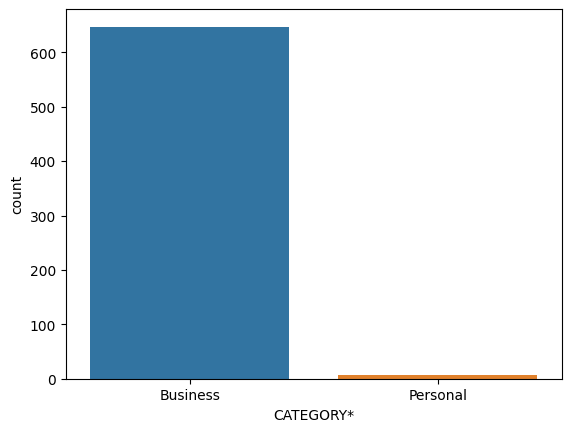

In [20]:
sns.countplot(x=df["CATEGORY*"],data=df)

how long they travel

In [22]:
df["MILES*"]

0        5.1
2        4.8
3        4.7
4       63.7
5        4.3
        ... 
1150     0.7
1151     3.9
1152    16.2
1153     6.4
1154    48.2
Name: MILES*, Length: 653, dtype: float64

<AxesSubplot:xlabel='MILES*', ylabel='count'>

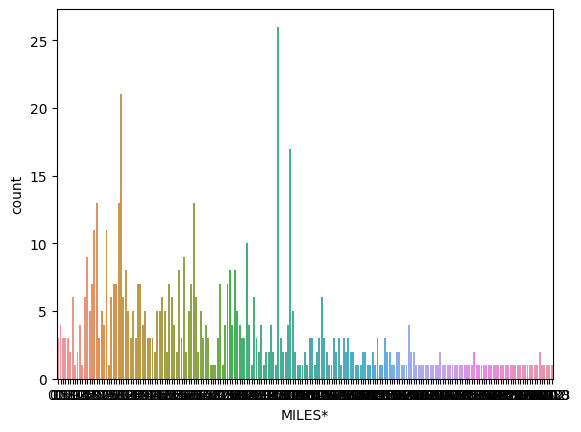

In [24]:
sns.countplot(x=df["MILES*"], data=df)

<AxesSubplot:ylabel='Frequency'>

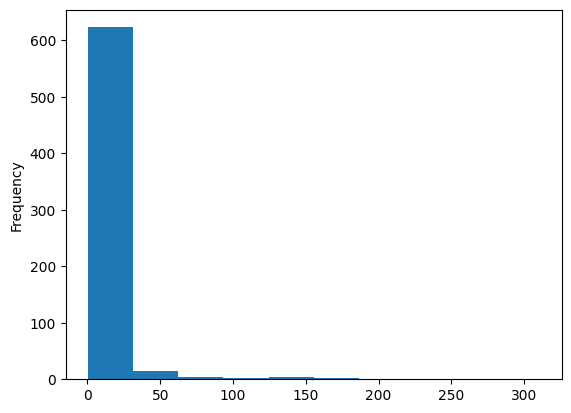

In [26]:
df["MILES*"].plot.hist()
# result shows that most peolpe go fr=or short distance

at what tome they book most

In [27]:
df["MILES*"]

0        5.1
2        4.8
3        4.7
4       63.7
5        4.3
        ... 
1150     0.7
1151     3.9
1152    16.2
1153     6.4
1154    48.2
Name: MILES*, Length: 653, dtype: float64

In [30]:
df["HOUR"]

0       21
2       20
3       17
4       14
5       17
        ..
1150     1
1151    13
1152    15
1153    21
1154    22
Name: HOUR, Length: 653, dtype: int64

<AxesSubplot:ylabel='Frequency'>

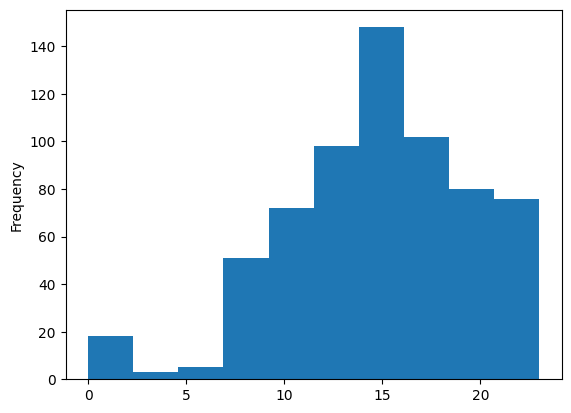

In [31]:
df["HOUR"].plot.hist()

<AxesSubplot:xlabel='HOUR', ylabel='count'>

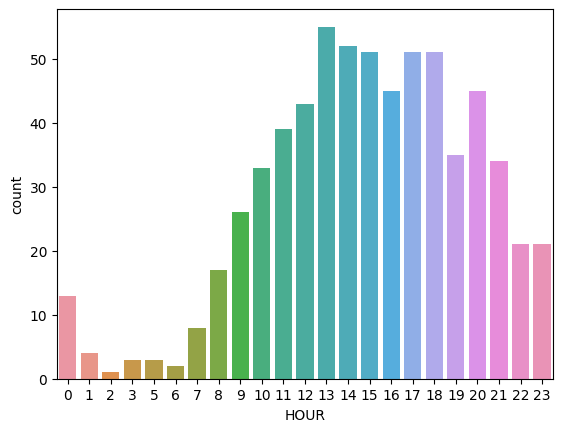

In [36]:
sns.countplot(x=df["HOUR"],data=df)

Text(0, 0.5, 'frequency')

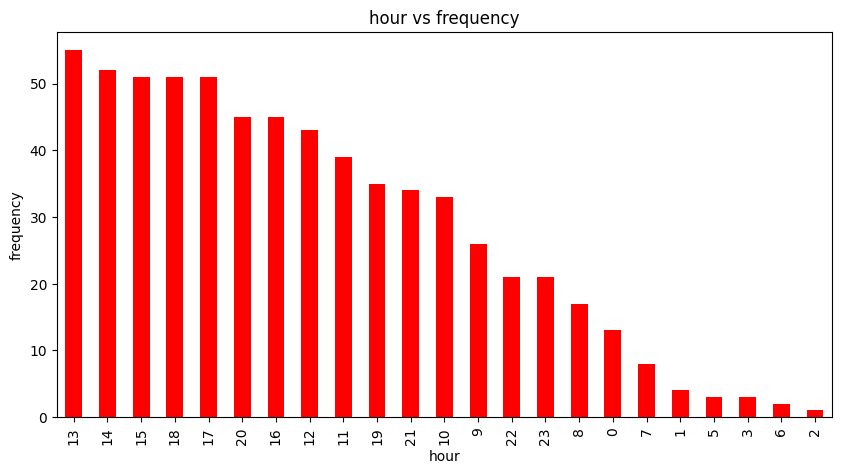

In [41]:
hours=df["START_DATE*"].dt.hour.value_counts()
hours.plot(kind="bar",color="red",figsize=(10,5))
plt.title("hour vs frequency")
plt.xlabel("hour")
plt.ylabel("frequency")

checking purpose

In [42]:
df["PURPOSE*"]

0        Meal/Entertain
2       Errand/Supplies
3               Meeting
4        Customer Visit
5        Meal/Entertain
             ...       
1150            Meeting
1151     Temporary Site
1152            Meeting
1153     Temporary Site
1154     Temporary Site
Name: PURPOSE*, Length: 653, dtype: object

In [47]:
df["PURPOSE*"].value_counts

<bound method IndexOpsMixin.value_counts of 0        Meal/Entertain
2       Errand/Supplies
3               Meeting
4        Customer Visit
5        Meal/Entertain
             ...       
1150            Meeting
1151     Temporary Site
1152            Meeting
1153     Temporary Site
1154     Temporary Site
Name: PURPOSE*, Length: 653, dtype: object>

<AxesSubplot:>

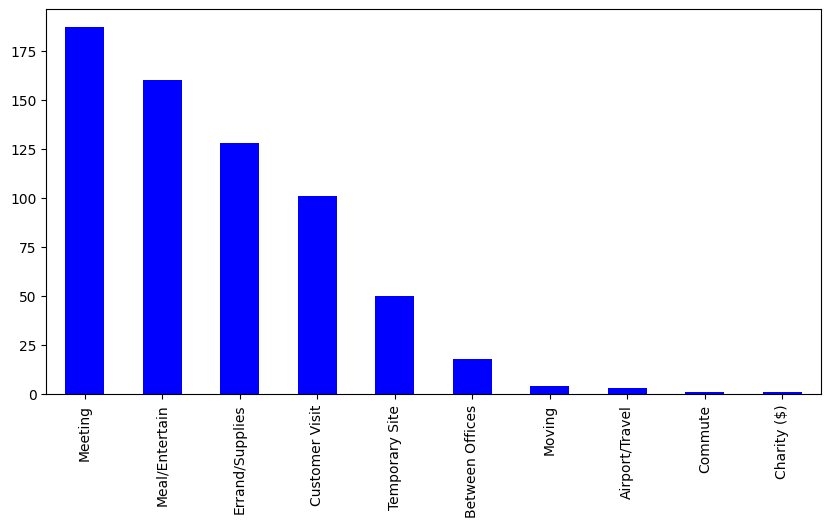

In [55]:
df["PURPOSE*"].value_counts().plot(kind="bar",color="blue",figsize=(10,5))

day of highest booking

<AxesSubplot:>

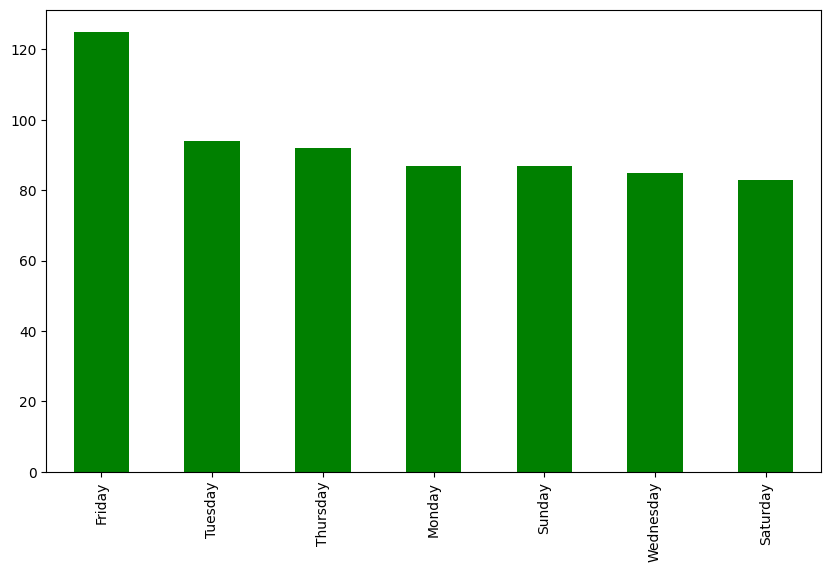

In [58]:
df["WEEKDAY"].value_counts().plot(kind="bar",color="green",figsize=(10,6))

number of trips each day

<AxesSubplot:>

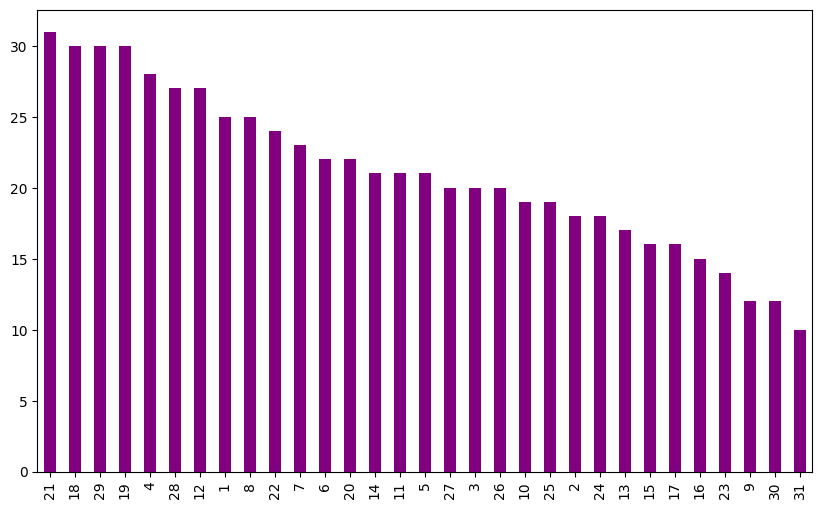

In [60]:
df["DAY"].value_counts().plot(kind="bar",color="purple",figsize=(10,6))

<AxesSubplot:xlabel='DAY', ylabel='count'>

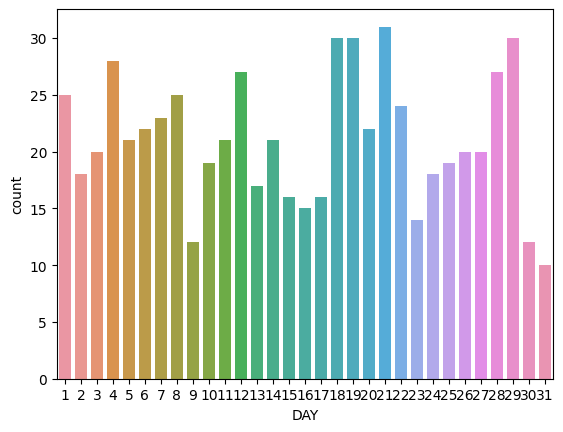

In [61]:
sns.countplot(x=df["DAY"],data=df)

checking month

<AxesSubplot:>

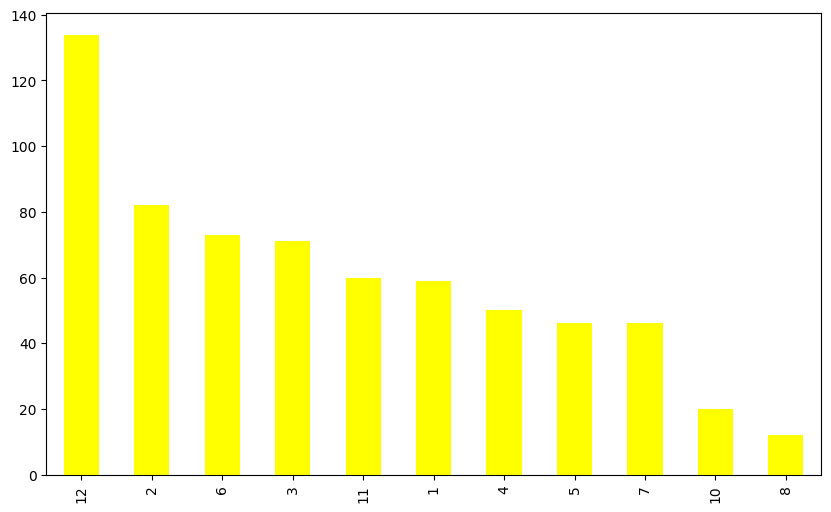

In [62]:
df["MONTH"].value_counts().plot(kind="bar",color="yellow",figsize=(10,6))

<AxesSubplot:xlabel='MONTH', ylabel='count'>

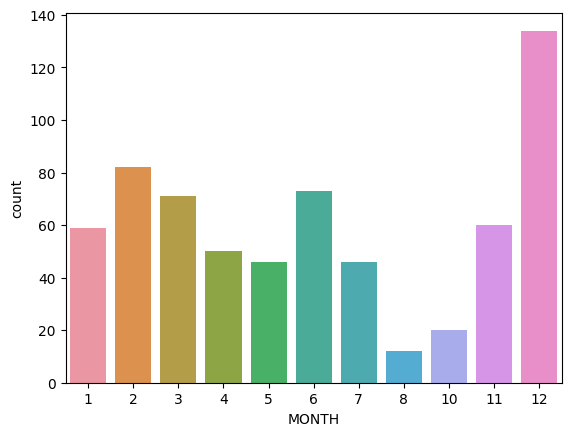

In [63]:
sns.countplot(x=df["MONTH"],data=df)

starting and reaching point

<AxesSubplot:>

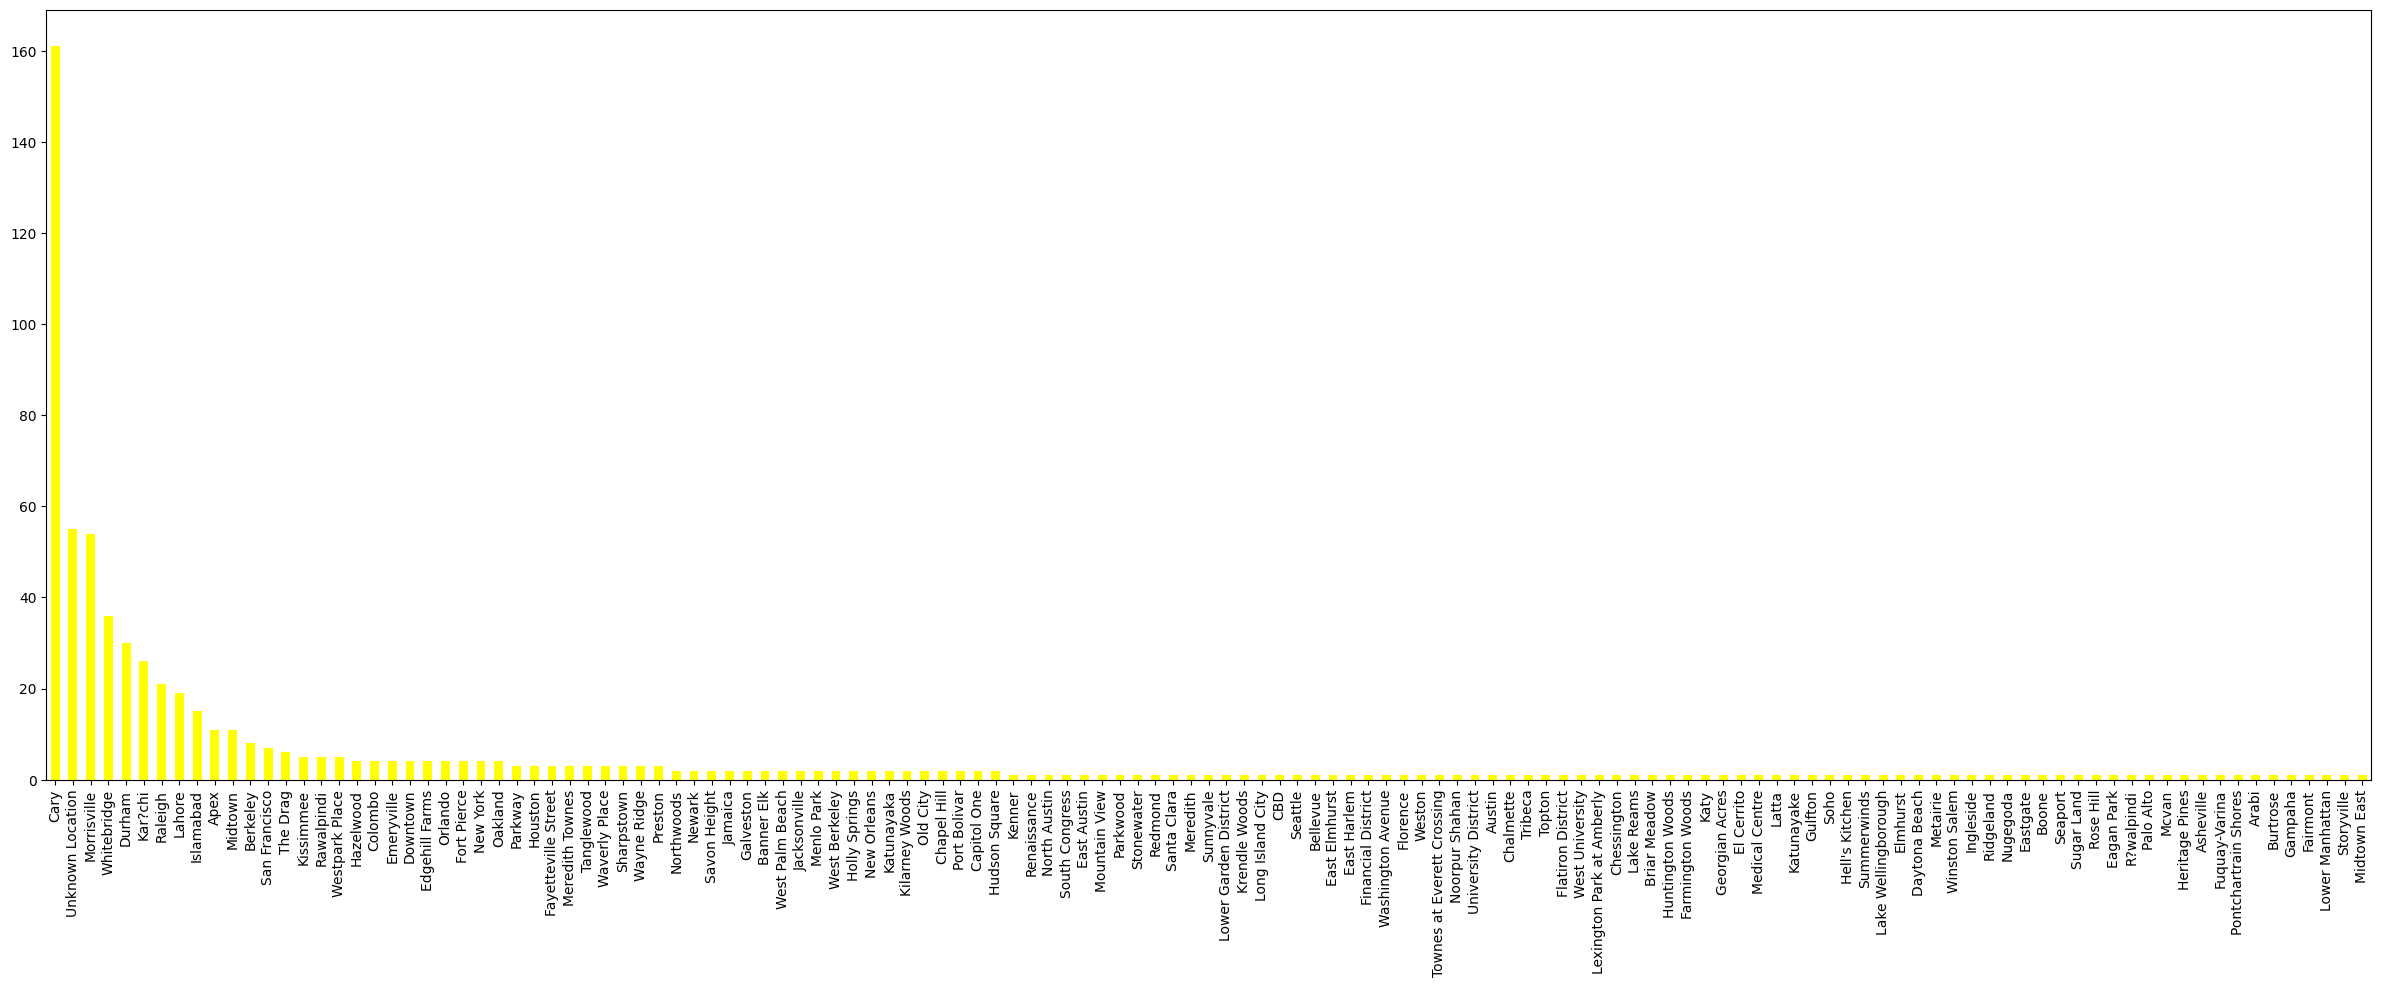

In [66]:
df["START*"].value_counts().plot(kind="bar",color="yellow",figsize=(30,10))